# Residential Rooftop PV Example

## Set up.

### Import packages.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath("../src"))

In [2]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import re                as re
import scipy.stats       as st
import seaborn           as sb
import tyche             as ty

from copy import deepcopy

## Scenario analyses.

### Load data.

#### The data are stored in a set of tab-separated value files in a folder.

In [3]:
designs = ty.Designs("data/pv_residential_validation")

#### Compile the production and metric functions for each technology in the dataset.

In [4]:
designs.compile()

### Examine the data.

#### The `functions` table specifies where the Python code for each technology resides.

In [5]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Residential PV,numpy,pv_residential_simple,capital_cost,fixed_cost,production,metrics,


Right now, only the style `numpy` is supported.

#### The `indices` table defines the subscripts for variables.

In [6]:
designs.indices.sort_values(["Technology", "Type", "Offset"])

Offset  \
Technology     Type    Index                 
Residential PV Capital Module            0   
                       Inverter          1   
                       BoS               2   
               Fixed   System            0   
               Input   NaN               0   
               Metric  LCOE              0   
                       Labor             1   
                       GHG               2   
               Output  Electricity       0   

                                                              Description  \
Technology     Type    Index                                                
Residential PV Capital Module                               system module   
                       Inverter                          system inverters   
                       BoS                              balance of system   
               Fixed   System                                whole system   
               Input   NaN                                      no inputs   
               Metric  LCOE         reduction in levelized cost of energy   
                       Labor                increase in spending on wages   
                       GHG                              reduction in GHGs   
               Output  Electricity                  electricity generated   

                                   Notes  
Technology     Type    Index              
Residential PV Capital Module             
                       Inverter           
                       BoS                
               Fixed   System             
               Input   NaN                
               Metric  LCOE               
                       Labor              
                       GHG                
               Output  Electricity

#### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [7]:
designs.designs.xs("2015 Actual", level="Scenario", drop_level=False)

Value  \
Technology     Scenario    Variable          Index               
Residential PV 2015 Actual Input             NaN             0   
                           Input efficiency  NaN             1   
                           Input price       NaN             0   
                           Lifetime          BoS             1   
                                             Inverter        1   
                                             Module          1   
                           Output efficiency Electricity     1   
                           Output price      Electricity     0   
                           Scale             NaN             1   

                                                                    Units  \
Technology     Scenario    Variable          Index                          
Residential PV 2015 Actual Input             NaN                        1   
                           Input efficiency  NaN                        1   
                           Input price       NaN                        1   
                           Lifetime          BoS          system-lifetime   
                                             Inverter     system-lifetime   
                                             Module       system-lifetime   
                           Output efficiency Electricity              W/W   
                           Output price      Electricity            $/kWh   
                           Scale             NaN            system/system   

                                                                                                    Notes  
Technology     Scenario    Variable          Index                                                         
Residential PV 2015 Actual Input             NaN                                                no inputs  
                           Input efficiency  NaN                                                no inputs  
                           Input price       NaN                                                no inputs  
                           Lifetime          BoS                                per-lifetime computations  
                                             Inverter                           per-lifetime computations  
                                             Module                             per-lifetime computations  
                           Output efficiency Electricity  see parameter table for individual efficiencies  
                           Output price      Electricity                   not tracking electricity price  
                           Scale             NaN                                               no scaling

#### The `parameters` table contains additional techno-economic parameters for each technology.

In [8]:
designs.parameters.xs("2015 Actual", level="Scenario", drop_level=False).sort_values(["Technology", "Scenario", "Offset"])

Offset  \
Technology     Scenario    Parameter                             
Residential PV 2015 Actual Discount Rate                     0   
                           Insolation                        1   
                           System Size                       2   
                           Module Capital                    3   
                           Module Lifetime                   4   
                           Module Efficiency                 5   
                           Module Aperture                   6   
                           Module O&M Fixed                  7   
                           Module Degradation                8   
                           Location Capacity Factor          9   
                           Module Soiling Loss              10   
                           Inverter Capital                 11   
                           Inverter Lifetime                12   
                           Inverter Replacement             13   
                           Inverter Efficiency              14   
                           DC-to-AC Ratio                   15   
                           Hardware Capital                 16   
                           Direct Labor                     17   
                           Permitting                       18   
                           Customer Acquisition             19   
                           Installer Overhead & Profit      20   

                                                                                           Value  \
Technology     Scenario    Parameter                                                               
Residential PV 2015 Actual Discount Rate                                                    0.07   
                           Insolation                                                       1000   
                           System Size                                                        36   
                           Module Capital                    st.triang(0.5, loc=110, scale=0.11)   
                           Module Lifetime                  st.triang(0.5, loc=25, scale=0.0025)   
                           Module Efficiency              st.triang(0.5, loc=0.16, scale=1.6e-5)   
                           Module Aperture                   st.triang(0.5, loc=0.9, scale=9e-5)   
                           Module O&M Fixed                  st.triang(0.5, loc=20, scale=0.002)   
                           Module Degradation           st.triang(0.5, loc=0.0075, scale=7.5e-7)   
                           Location Capacity Factor          st.triang(0.5, loc=0.2, scale=2e-5)   
                           Module Soiling Loss              st.triang(0.5, loc=0.05, scale=5e-6)   
                           Inverter Capital                  st.triang(0.5, loc=0.3, scale=3e-5)   
                           Inverter Lifetime                st.triang(0.5, loc=16, scale=0.0016)   
                           Inverter Replacement              st.triang(0.5, loc=0.5, scale=5e-5)   
                           Inverter Efficiency               st.triang(0.5, loc=0.9, scale=9e-5)   
                           DC-to-AC Ratio                 st.triang(0.5, loc=1.4, scale=0.00014)   
                           Hardware Capital                  st.triang(0.5, loc=80, scale=0.008)   
                           Direct Labor                      st.triang(0.5, loc=2000, scale=0.2)   
                           Permitting                        st.triang(0.5, loc=600, scale=0.06)   
                           Customer Acquisition              st.triang(0.5, loc=2000, scale=0.2)   
                           Installer Overhead & Profit    st.triang(0.5, loc=0.35, scale=3.5e-5)   

                                                           Units Notes  
Technology     Scenario    Parameter                                    
Residential PV 2015 Actual Discount Rate                  1/year    DR  
                 

#### The `results` table specifies the units of measure for results of computations.

In [9]:
designs.results

Units Notes
Technology     Variable Index                           
Residential PV Cost     Cost              $/system      
               Metric   GHG          ΔgCO2e/system      
                        LCOE                Δ$/kWh      
                        Labor            Δ$/system      
               Output   Electricity            kWh

### Evaluate the scenarios in the dataset.

In [10]:
scenario_results = designs.evaluate_scenarios(sample_count=500)

In [11]:
scenario_results

Value  \
Technology     Scenario    Sample Variable Index                        
Residential PV 2015 Actual 1      Cost     Cost          19539.199669   
                                  Metric   GHG               0.000576   
                                           LCOE             -0.000002   
                                           Labor             0.019346   
                                  Output   Electricity  184112.237566   
...                                                               ...   
               Expert C    500    Cost     Cost          14846.440839   
                                  Metric   GHG              47.058764   
                                           LCOE              0.054736   
                                           Labor          -417.654727   
                                  Output   Electricity  288905.727647   

                                                                Units  
Technology     Scenario    Sample Variable Index                       
Residential PV 2015 Actual 1      Cost     Cost              $/system  
                                  Metric   GHG          ΔgCO2e/system  
                                           LCOE                Δ$/kWh  
                                           Labor            Δ$/system  
                                  Output   Electricity            kWh  
...                                                               ...  
               Expert C    500    Cost     Cost              $/system  
                                  Metric   GHG          ΔgCO2e/system  
                                           LCOE                Δ$/kWh  
                                           Labor            Δ$/system  
                                  Output   Electricity            kWh  

[10000 rows x 2 columns]

#### Plot the results.

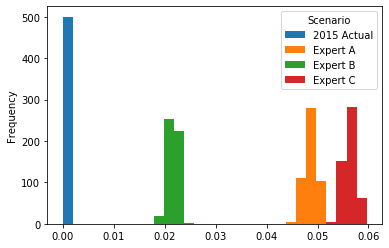

In [12]:
expert_results = scenario_results[["Value"]].xs(
    "LCOE", level="Index"
).rename(
    columns={"Value" : "LCOE [Δ$/kWh]"}
).unstack(
    ["Scenario"]
).xs("LCOE [Δ$/kWh]", axis=1, drop_level=True).reset_index(drop=True)
expert_results.plot.hist(bins=30)

### Make tornado plots for Expert A.

#### Remember base case LCOE.

In [13]:
base_lcoe = 0.10613269974604357

#### Define the factors.

In [14]:
tornado_factors = [
    "MCC", "MLT", "MEF", "MAP", "MOM",
    "MDR", "ICC", "ILT", "IRC", "IEF",
    "BCC", "BLR", "BPR", "BCA", "BOH",
]

#### Add the scenarios to the design.

In [15]:
designs.parameters

Offset  \
Technology     Scenario    Parameter                      
Residential PV 2015 Actual Customer Acquisition      19   
                           DC-to-AC Ratio            15   
                           Direct Labor              17   
                           Discount Rate              0   
                           Hardware Capital          16   
...                                                 ...   
               Expert C    Module Lifetime            4   
                           Module O&M Fixed           7   
                           Module Soiling Loss       10   
                           Permitting                18   
                           System Size                2   

                                                                                  Value  \
Technology     Scenario    Parameter                                                      
Residential PV 2015 Actual Customer Acquisition     st.triang(0.5, loc=2000, scale=0.2)   
                           DC-to-AC Ratio        st.triang(0.5, loc=1.4, scale=0.00014)   
                           Direct Labor             st.triang(0.5, loc=2000, scale=0.2)   
                           Discount Rate                                           0.07   
                           Hardware Capital         st.triang(0.5, loc=80, scale=0.008)   
...                                                                                 ...   
               Expert C    Module Lifetime              st.triang(0.5, loc=28, scale=3)   
                           Module O&M Fixed             st.triang(0.5, loc=15, scale=1)   
                           Module Soiling Loss   st.triang(0.5, loc=0.05, scale=10E-06)   
                           Permitting                 st.triang(0.5, loc=530, scale=10)   
                           System Size                                               36   

                                                    Units Notes  
Technology     Scenario    Parameter                             
Residential PV 2015 Actual Customer Acquisition  $/system   BCA  
                           DC-to-AC Ratio               1   IDC  
                           Direct Labor          $/system   BLR  
                           Discount Rate           1/year    DR  
                           Hardware Capital         $/m^2   BCC  
...                                                   ...   ...  
               Expert C    Module Lifetime             yr   MLT  
                           Module O&M Fixed        $/kWyr   MOM  
                           Module Soiling Loss          1   MSL  
                           Permitting            $/system   BPR  
                           System Size                m^2   SSZ  

[84 rows x 4 columns]

In [16]:
design_2015_actual    = designs.designs.xs   ("2015 Actual", level="Scenario")
parameter_2015_actual = designs.parameters.xs("2015 Actual", level="Scenario")
parameter_expert_a    = designs.parameters.xs("Expert A"   , level="Scenario")
for factor in tornado_factors:
    scenario_new = factor
    design_new = design_2015_actual.copy()
    design_new["Scenario"] = scenario_new
    designs.designs = designs.designs.append(design_new.reset_index().set_index(["Technology", "Scenario", "Variable", "Index"]))
    parameter_new = pd.concat([
        parameter_2015_actual[parameter_2015_actual["Notes"] != factor],
        parameter_expert_a   [parameter_expert_a   ["Notes"] == factor],
    ])
    parameter_new["Scenario"] = factor
    designs.parameters = designs.parameters.append(parameter_new.reset_index().set_index(["Technology", "Scenario", "Parameter"]))

#### Recompile the design.

In [17]:
designs.compile()

#### Compute the results.

In [18]:
scenario_results = designs.evaluate_scenarios(sample_count=500)
scenario_results.shape

(47500, 2)

#### Make the tornado plot.

In [19]:
tornado_results =scenario_results[[
    "Value"
]].xs(
    "LCOE", level="Index"
).rename(
    columns={"Value" : "LCOE [$/kWh]"}
).reset_index(
    ["Technology", "Sample", "Variable"], drop=True
).drop(
    ["2015 Actual", "Expert A", "Expert B", "Expert C"]
).reset_index(
).sort_values(
    "LCOE [$/kWh]", ascending = False
)
tornado_results["LCOE Reduction [%]"] = 100 * tornado_results["LCOE [$/kWh]"] / 0.106125

In [20]:
pl.figure(figsize=(8, 6), dpi = 300)

<Figure size 2400x1800 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

In [21]:
sb.set(font_scale = 1)

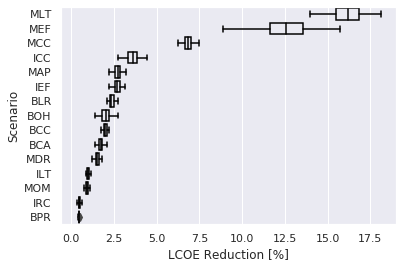

In [22]:
ax = sb.boxplot(
    data = tornado_results,
    y = "Scenario",
    x = "LCOE Reduction [%]"
)
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('none')
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

In [23]:
z = list(ax.get_children())

In [24]:
sb.barplot(
    data = tornado_results.groupby("Scenario").agg(np.mean).reset_index().sort_values(
    "LCOE [$/kWh]", ascending = False,
),
    y = "Scenario",
    x = "LCOE Reduction [%]",
    color = "lightblue",
    ax = ax,
)

In [25]:
for zi in z:
    zi.set_zorder(1000)

In [26]:
ax.set_xlabel("LCOE Reduction [%]",fontsize=15)
ax.set_ylabel("Scenario",fontsize=15)
ax.tick_params(labelsize=15)

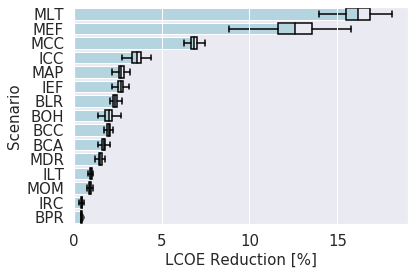

In [27]:
ax.figure

In [28]:
ax.figure.savefig("pv_residential_validation.png", dpi = 300, bbox_inches = "tight")